In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [10]:
model = Sequential()
#convolutional
model.add(Conv2D(64, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layers
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

#output layer
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9248)              0         
__________

In [3]:
batch_size = 16

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('male_female/train', target_size=(150, 150),
                                                    batch_size=batch_size, class_mode='binary')
validation_generator = test_datagen.flow_from_directory('male_female/validation', target_size=(150, 150),
                                                        batch_size=batch_size, class_mode='binary')

Found 1960 images belonging to 2 classes.
Found 840 images belonging to 2 classes.


In [6]:
train_generator[0]

(array([[[[ 0.76583105,  0.77872092,  0.7960785 ],
          [ 0.76583922,  0.77873725,  0.7960785 ],
          [ 0.76584738,  0.77875358,  0.7960785 ],
          ..., 
          [ 0.72389555,  0.74350339,  0.75759488],
          [ 0.72390366,  0.74351156,  0.75761127],
          [ 0.72391188,  0.74351972,  0.75762767]],
 
         [[ 0.76695412,  0.78321517,  0.79832667],
          [ 0.7669459 ,  0.78319061,  0.79831845],
          [ 0.76693773,  0.78316605,  0.79831028],
          ..., 
          [ 0.72261512,  0.74222296,  0.75398767],
          [ 0.7226069 ,  0.7422148 ,  0.7539795 ],
          [ 0.72259879,  0.74220663,  0.75397134]],
 
         [[ 0.76182795,  0.77803606,  0.79320049],
          [ 0.76186067,  0.77808505,  0.79323322],
          [ 0.76189333,  0.77813417,  0.79326588],
          ..., 
          [ 0.72549021,  0.74709076,  0.75686282],
          [ 0.72549021,  0.74705803,  0.75686282],
          [ 0.72549021,  0.74702537,  0.75686282]],
 
         ..., 
         [

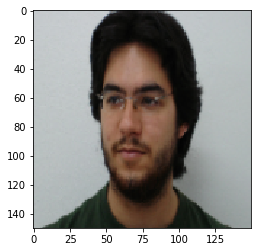

In [7]:
plt.imshow(train_generator[0][0][0])

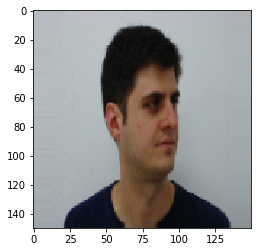

In [8]:
plt.imshow(train_generator[0][0][2])

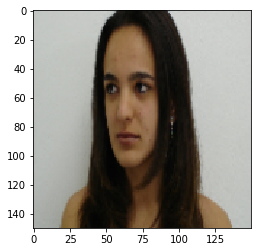

In [9]:
plt.imshow(train_generator[0][0][7])

In [13]:
callback = keras.callbacks.TensorBoard(log_dir='./male_female_logs', histogram_freq=0, batch_size=32, write_graph=True, 
                                       write_grads=False, write_images=False, embeddings_freq=0, 
                                       embeddings_layer_names=None, embeddings_metadata=None)

In [14]:
model.fit_generator(train_generator, steps_per_epoch=1960//batch_size, epochs=30,
                    validation_data=validation_generator, validation_steps=840//batch_size, callbacks=[callback])

Epoch 1/30
122/122 [==============================] - 225s 2s/step - loss: 0.5241 - acc: 0.7290 - val_loss: 0.3324 - val_acc: 0.8870
Epoch 2/30
122/122 [==============================] - 1148s 9s/step - loss: 0.3286 - acc: 0.8801 - val_loss: 0.3200 - val_acc: 0.8990
Epoch 3/30
122/122 [==============================] - 231s 2s/step - loss: 0.2840 - acc: 0.8950 - val_loss: 0.3289 - val_acc: 0.8774
Epoch 4/30
122/122 [==============================] - 243s 2s/step - loss: 0.2561 - acc: 0.9052 - val_loss: 0.2180 - val_acc: 0.9195
Epoch 5/30
122/122 [==============================] - 230s 2s/step - loss: 0.2421 - acc: 0.9119 - val_loss: 0.3092 - val_acc: 0.8690
Epoch 6/30
122/122 [==============================] - 268s 2s/step - loss: 0.2238 - acc: 0.9150 - val_loss: 0.2753 - val_acc: 0.8762
Epoch 7/30
122/122 [==============================] - 253s 2s/step - loss: 0.2158 - acc: 0.9196 - val_loss: 0.2683 - val_acc: 0.8978
Epoch 8/30
122/122 [==============================] - 236s 2s/step -

# Benchmark

1. - conv 64 'relu', layer 64 'relu', layer 1 'sigmoid' 
   - epocha 10, batch size 16, optimizer 'rmsprop'
   - loss: 0.1637 - acc: 0.9467 - val_loss: 0.2429 - val_acc: 0.9135

2. - conv 32 'relu', conv 64 'relu', layer 64 'relu', layer 1 'sigmoid'
   - epocha 10, batch size 16, optimizer 'rmsprop'
   - loss: 0.1403 - acc: 0.9595 - val_loss: 0.2117 - val_acc: 0.9026
   
3. - conv 32 'relu', conv 32 'relu', conv 64 'relu', layer 64 'relu', layer 1 'sigmoid'
   - epocha 10, batch size 16, optimizer 'rmsprop'
   - loss: 0.1287 - acc: 0.9513 - val_loss: 0.2827 - val_acc: 0.9038
   
4. - conv 32 'relu', conv 32 'relu', conv 64 'relu', layer 64 'relu', layer 1 'sigmoid'
   - epocha 20, batch size 16, optimizer 'rmsprop'
   - loss: 0.0752 - acc: 0.9744 - val_loss: 0.2794 - val_acc: 0.9363
   
5. - conv 32 'relu', conv 32 'relu', conv 64 'relu', layer 64 'relu', layer 1 'sigmoid'
   - epocha 30, batch size 16, optimizer 'rmsprop'
   - loss: 0.0750 - acc: 0.9785 - val_loss: 0.2379 - val_acc: 0.9303
   
### 6. - conv 32 'relu', conv 32 'relu', conv 64 'relu', layer 64 'relu', layer 1 'sigmoid'
###     - epocha 30, batch size 16, optimizer 'adam'
###     - loss: 0.0339 - acc: 0.9872 - val_loss: 0.1873 - val_acc: 0.9435
   
7. - conv 32 'relu', conv 32 'relu', conv 64 'relu', layer 64 'relu', layer 1 'sigmoid'
   - epocha 50, batch size 16, optimizer 'rmsprop'
   - loss: 0.0984 - acc: 0.9810 - val_loss: 0.8020 - val_acc: 0.9327
8. - in progress   

In [11]:
model.save_weights('male_female_recognition_model.h5')